# data load

In [23]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data.csv', encoding='euc-kr',index_col=0)
name = data.index
X = np.array(data)

# scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)
scaled_X = scale.transform(X)
X_train = scaled_X
X_test = scaled_X

# AE 학습

In [10]:
import tensorflow as tf

################
# layer params #
################

n_inputs = 25880
n_hidden = 400 
n_outputs = n_inputs
# autoencoder
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)
################
# Train params #
################
learning_rate = 0.01
n_iterations = 1000
pca = hidden
# loss
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE
# optimizer
train_op = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_loss)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        train_op.run(feed_dict={X: X_train})
    pca_val = pca.eval(feed_dict={X: X_test})
    

In [26]:
df=pd.DataFrame(pca_val)

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_ = scale.transform(df)

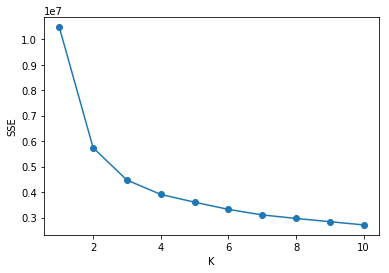

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.savefig('fig.png', dpi=300)
    plt.show()
    

elbow(df)


In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 10
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(df)
predict = pd.DataFrame(model.predict(df))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefghijklmnopqr'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

     predict
0          9
1          6
2          3
3          8
4          1
..       ...
121        1
122        4
123        8
124        6
125        8

[126 rows x 1 columns]
1번째 군집은 12개
2번째 군집은 22개
3번째 군집은 11개
4번째 군집은 16개
5번째 군집은 14개
6번째 군집은 1개
7번째 군집은 5개
8번째 군집은 4개
9번째 군집은 15개
10번째 군집은 26개


         pc1      pc2  singer cluster
0   -112.211 -177.872    10cm       j
1     608.77 -25.9668    Buzz       g
2   -32.4225 -78.3893   Crush       d
3   -85.2222  176.987   jk김동욱       i
4    105.934 -101.057  K.Will       b
..       ...      ...     ...     ...
121  155.823 -53.8053      환희       b
122  90.5532  92.9298     황인욱       e
123  -151.27  69.0148      효린       i
124  614.134  105.717      휘성       g
125 -66.1148  27.6322      휘인       i

[126 rows x 4 columns]


,pc1,pc2,singer,cluster
3,-85.2222,176.987,jk김동욱,i
16,-8.71051,48.2186,김윤아,i
28,-204.508,78.8672,린,i
36,-35.4947,113.895,박진영,i
56,-128.379,60.1277,수지,i
57,-139.716,57.1968,신승훈,i
58,-29.585,78.5005,신예영,i
63,-59.1516,98.2386,양파,i
82,-52.8679,111.37,이적,i
90,-163.204,124.353,임정희,i


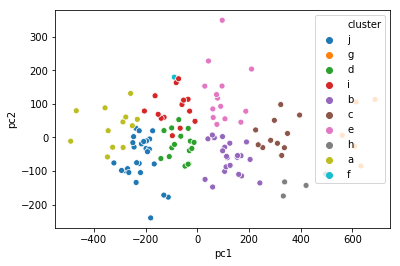

In [52]:
from sklearn.preprocessing import StandardScaler
import numpy as np


#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(df)
new = np.c_[pc,name, predict]
df_1  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df_1)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df_1)
#plt.savefig('fig3.png', dpi=300)
df_1[df_1['cluster']=='i']